## From the camera frame to the image plane: the Pinhole model
![pinhole](imgs/pinhole.png)

The transformation that sends 3D coordinates from the camera coordinates system to the image plane is a **projective transformation**.
How are they projected?
![1D1](imgs/1D1.png)
The 3D point $\mathbf{P}$ located at a depth $Z$ and a distance $X$ from the optical center will be projected at a poin $\mathbf{p}$ such that (Thales Theorem):
![1D1](imgs/1D2.png)
In 3D, $\mathbf{P}=(X,Y,Z)$ is projected in the image plane such that:
![1D1](imgs/1D3.png)
with:

$x_{cam}=\frac{f}{Z}X$

$y_{cam}=\frac{f}{Z}Y$

## Homogeneous coordinates
This projection can be expressed using **homogeneous coordinates** (a single matrix containing the rotation and the translation) and we have:

$\mathbf{x}=\mathbf{P}\cdot\mathbf{X}$

with:

$\mathbf{X}=(\begin{matrix} X & Y & Z & 1 \end{matrix})^T$

### What is that 4th component?
Let us consider the 1D case:
* normaly, in non-homogeneous coordinate system, there is only a single dimension for $\mathbf{P}$. Ex: $X=3$.
![homog1](imgs/homog1.png)
* In an homogeneous system, a 1D point is represented as a 2D vector, defining a ray!
![homog2](imgs/homog2.png)
in such a system, a vector is defined **up to a scale factor**.
![homog3](imgs/homog3.png)

In a 2D world:
* in a non homogeneous system, $\mathbf{P}$ has two dimensions
![homog2D1](imgs/homog2D1.png)
* in an homogeneous system, a 2D point has 3 dimensions
![homog2D2](imgs/homog2D2.png)
**This is our Pinhole camera model!**

Except the 3rd componend has the value of the focal length _f_

Our 3D point $(\begin{matrix} X & Y & Z \end{matrix})$ is projected in the image plane at $(\begin{matrix} x_{cam} & y_{cam}\end{matrix})$.

This can be written as:
$\lambda\left(\begin{matrix} x_{cam} \\ y_{cam} \\ f \end{matrix}\right)=\left(\begin{matrix} X \\ Y \\ Z \end{matrix}\right)$
with
$\lambda=\frac{Z}{f}$

Using homogeneous coordinates it can be expressed as a linear transformation
$\left(\begin{matrix} x_{cam} \\ y_{cam} \\ f \end{matrix}\right)\stackrel{\text{Up to a scale factor}}{\approx}\left(\begin{matrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0\end{matrix}\right)\cdot\left(\begin{matrix} X \\ Y \\ Z \\ 1 \end{matrix}\right)$

# From the image plane to pixel coordinates
How are these camera $\left(\begin{matrix} x_{cam} & y_{cam} \end{matrix}\right)$ relate to the pixel coordinates in an image?
![pix1](imgs/pix1.png)

$x=-f*x_{cam}+x_0$

$y=-f*y_{cam}+y_0$

## What if pixels aren't square?
$x=-k_x*x_{cam}+x_0$

$y=-k_y*y_{cam}+y_0$

where k_x, k_y are pixels/length.

Using homogeneous coordinates:

$\left(\begin{matrix} x \\ y \\ 1 \end{matrix}\right)=\frac{1}{f}\underbrace{\left(\begin{matrix} \alpha_x & 0 & x_0 \\ 0 & \alpha_y & y_0 \\ 0 & 0 & 1 \end{matrix}\right)}_{\text{Camera calibration matrix}}\left(\begin{matrix} x_{cam} \\ y_{cam} \\ f \end{matrix}\right)$

where $\alpha_x=-fk_x$ and $\alpha_y=-fk_y$

This matrix:
* completely describes the internal camera parameters of a pinhole camera
* is a $3\times3$ upper triangular matrix
* The 4 internal camera parameters are:
    * $\alpha_x$ and $\alpha_y$ scaling in x and y directions
    * ($x_0,y_0$) location of the principal point
* $\frac{\alpha_y}{\alpha_x}$ is the aspect ratio

# Summary
Now we can (almost) describe how a point in 3D space projects onto an image
* Transform the 3D point to the camera reference frame
$\left(\begin{matrix} X' \\ Y' \\ Z' \\ 1 \end{matrix}\right)=\left(\begin{matrix}\mathbf{R}^T & -\mathbf{t} \\ \mathbf{0}^T & 1\end{matrix}\right)\cdot\left(\begin{matrix} X \\ Y \\ Z \\ 1 \end{matrix}\right)$

With $\mathbf{R}$ the rotation matrix of the camera and $\mathbf{t}$ its translation vector (what you have been coding without homogeneous coordinates in Part.1).
* Project the points onto the image plane
$\left(\begin{matrix} x_{cam} \\ y_{cam} \\ f \end{matrix}\right)=\left(\begin{matrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{matrix}\right)\cdot\left(\begin{matrix} X' \\ Y' \\ Z' \\ 1 \end{matrix}\right)$
* Map the points on the image plane into pixel coordinates
$\left(\begin{matrix} x \\ y \\ 1 \end{matrix}\right)=\frac{1}{f}\left(\begin{matrix} \alpha_x & 0 & x_0 \\ 0 & \alpha_y & y_0 \\ 0 & 0 & 1 \end{matrix}\right)\cdot\left(\begin{matrix} x_{cam} \\ y_{cam} \\ f \end{matrix}\right)$

Combining these transforms we have:
$\left(\begin{matrix} x \\ y \\ 1 \end{matrix}\right)=\underbrace{\frac{1}{f}}_{\text{Homog. coord. up to a scale fact.: discard this}}\left(\begin{matrix} \alpha_x & 0 & x_0 \\ 0 & \alpha_y & y_0 \\ 0 & 0 & 1 \end{matrix}\right)\cdot\left(\begin{matrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{matrix}\right)\cdot\left(\begin{matrix}\mathbf{R}^T & -\mathbf{t} \\ \mathbf{0}^T & 1\end{matrix}\right)\cdot\left(\begin{matrix} X \\ Y \\ Z \\ 1 \end{matrix}\right)$

$\left(\begin{matrix} x \\ y \\ 1 \end{matrix}\right)=\left(\begin{matrix} \alpha_x & 0 & x_0 \\ 0 & \alpha_y & y_0 \\ 0 & 0 & 1 \end{matrix}\right)\cdot\left(\begin{matrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{matrix}\right)\cdot\left(\begin{matrix}\mathbf{R}^T & -\mathbf{t} \\ \mathbf{0}^T & 1\end{matrix}\right)\cdot\left(\begin{matrix} X \\ Y \\ Z \\ 1 \end{matrix}\right)$

$\left(\begin{matrix} x \\ y \\ 1 \end{matrix}\right)=\left(\begin{matrix} \alpha_x & 0 & x_0 \\ 0 & \alpha_y & y_0 \\ 0 & 0 & 1 \end{matrix}\right)\cdot\left[\begin{matrix}\mathbf{R}^T & -\mathbf{t}\end{matrix}\right]\cdot\left(\begin{matrix} X \\ Y \\ Z \\ 1 \end{matrix}\right)$

$\Leftrightarrow\mathbf{x}=\mathbf{K}\cdot\left[\mathbf{R}^T -\mathbf{t}\right]\cdot\mathbf{X}$

$\Leftrightarrow\underbrace{\mathbf{x}}_{\text{image point}}=\mathbf{P}_{3\times4}\cdot\underbrace{\mathbf{X}}_{\text{scene point}}$

## A projective camera is essentially an angle measuring device
A point on the image ca correspond to any 3D location on the ray from the centre of projection through that point on the image plane.
![pix2](imgs/pix2.png)

# Calibrating a camera
## Intrinsinc parameters
A single camera is characterized by 4 internal _camera parameters_
* $\alpha_x$ scaling factor in x-direction
* $\alpha_y$ scaling factor in y-direction
* ($x_0,y_0$) center of projection in image plane
These parameters are contained in the matrix $\mathbf{K}$
## Extrinsinc parameters
A camera also has 6 additional external camera parameters (3 translations, 3 rotations) describing the location and orientation of the camera with respect to the world coordinate frame

The calibration is obtained considering a calibrating object with geometrical landmarks whose 3D properties are known
![mire1](imgs/calObj1.png)

# Exercice
(re-using your previouly written 3D rotation matrix - beware the inverse), write the afore-described transformation.

In [4]:
# !Angles are given in radians!
import numpy as np
from math import cos,sin

def getTransform(alpha_x,apha_y,x_0,y0,alpha, beta, gamma, t1, t2, t3):
    # Your code here
    Rt=np.eye(3,4)
    K=np.eye(3,3)
    return np.dot(K,Rt)

In [15]:
# Don't modify me, just run me
%matplotlib inline
from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

# Generate a cloud of 3D points in the World coordinate system
pts=5*np.random.randn(4,20)+5
colors=np.random.rand(1,20)
pts[3,:]=1

from getFrameToDraw import getFrameToDraw

def showWorldAndCameraFrame(alpha_x=0,apha_y=0,x_0=0,y0=0,alpha=0,beta=0,gamma=0,t1=0,t2=0,t3=0):
    alpha=np.radians(alpha)
    beta=np.radians(beta)
    gamma=np.radians(gamma)
    MWorld2Pix=getTransform(alpha_x,apha_y,x_0,y0,alpha,beta,gamma,t1,t2,t3)
    
    PCam=np.dot(MWorld2Pix,pts)
    print(MWorld2Pix)
    print(PCam)
    
    fig=plt.figure()
    ax1=fig.add_subplot(121,projection='3d')
    ax1.scatter(pts[0,:],pts[1,:],pts[2,:],'o',c=colors)
    ax1.set_title("World Frame")
    ax1.set_xlim(0,15)
    ax1.set_ylim(0,15)
    ax1.set_zlim(0,15)
    ax1.set_xlabel("X World")
    ax1.set_ylabel("Y World")
    ax1.set_zlabel("Z World")
    ax2=fig.add_subplot(122)
    ax2.plot(PCam[0,:],PCam[1,:],'o')
    ax2.set_title("Camera Frame")
    ax2.set_xlim(-15,15)
    ax2.set_ylim(-15,15)
    ax2.set_xlabel("x pixels")
    ax2.set_ylabel("y pixels")
    a1,a2,a3=getFrameToDraw(MWorld2Pix)
    ax1.add_artist(a1)
    ax1.add_artist(a2)
    ax1.add_artist(a3)
    plt.draw()
    plt.show()

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]
[[ -0.50186653   3.00772675   4.70935303  12.21409245   5.33195438
    1.92930533  -3.87049474   4.12099039   7.59598111   0.66750599
    2.4340307   11.1119097    4.76130657   2.95736145   3.17398335
   -5.93518101   8.71242365  -0.77646767  11.92217305   2.71186771]
 [  7.35711868  10.33663533   7.88147639   7.85354165   5.72878262
   -1.39260333   1.08741659   2.63106835   4.16059796  -2.06390314
   -0.80885712   2.40147991   0.7444235   -7.7069709    4.43018769
    0.67859373  22.22007879  10.84029338  -3.85991364  -2.94033366]
 [  1.2522525    6.53362148   2.87068702   4.0748085   11.56202381
   13.37183909   6.8445641   -3.84518001   7.56426623   0.59538986
    5.65208335   3.07061794   1.91227532   5.53633884   5.74466518
    5.7404003    7.33259153   4.51977864  16.3683791    9.34216169]]


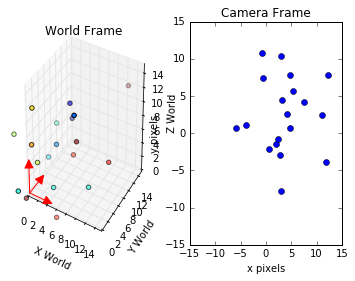

In [16]:
w=interactive(showWorldAndCameraFrame,alpha_x=(0,10.),apha_y=(0,10.),x_0=(0,10.),y0=(0,10.),alpha=(0.,360.),beta=(0.,360.),gamma=(0.,360.),t1=(0,10.),t2=(0,10.),t3=(0,10.))
clear_output(wait=True)
display(w)